In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

pd.set_option('display.max_columns', None)

sys.path.append(str(Path("..") / "03_src"))

In [3]:
import utils

In [4]:
orders = pd.read_csv(utils.path() + '\\03_curated\\orders_enriched.csv')
sellers = pd.read_csv(utils.path() + '\\03_curated\\seller_kpis.csv')

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,processing_time,shipping_time,delivery_time,IsSlowApproval,extreme_shipping_flag,extreme_delivery_flag,delivery_delay,late_delivery_flag,on_time_delivery,seller_id,customer_city,customer_state,seller_city,seller_state,late_shipping_flag
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,2,6,False,False,False,-8,False,True,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,SP,maua,SP,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,0,12,False,False,False,-6,False,True,289cdb325fb7e7f891c38608bf9e0962,barreiras,BA,belo horizonte,SP,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,0,9,False,False,False,-18,False,True,4869f7a5dfa277a7dca6462dcf3b52b2,vianopolis,GO,guariba,SP,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,3,9,False,False,False,-13,False,True,66922902710d126a0e7d26b0e3805106,sao goncalo do amarante,RN,belo horizonte,MG,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,0,1,False,False,False,-10,False,True,2c9e548be18521d1c43cde1c582c6de8,santo andre,SP,mogi das cruzes,SP,False


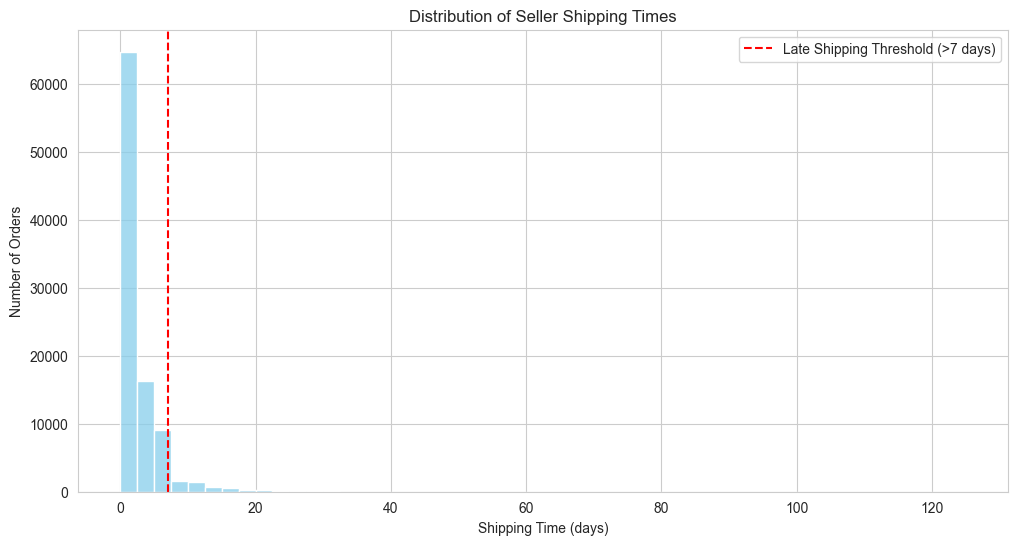

In [6]:
 # Distribution of shipping times
sns.histplot(orders['shipping_time'], bins=50, kde=False, color='skyblue')
plt.axvline(7, color='red', linestyle='--', label='Late Shipping Threshold (>7 days)')
plt.title('Distribution of Seller Shipping Times')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()




In [7]:
(orders['shipping_time'] > 7).value_counts()

shipping_time
False    90145
True      4937
Name: count, dtype: int64

In [8]:
total = 90145 + 4937
4937 / total, 90145/total

(0.05192360278496456, 0.9480763972150354)

In [9]:
# Count of late vs on-time shipments
orders['late_shipping_flag'].value_counts()

late_shipping_flag
False    90145
True      4937
Name: count, dtype: int64

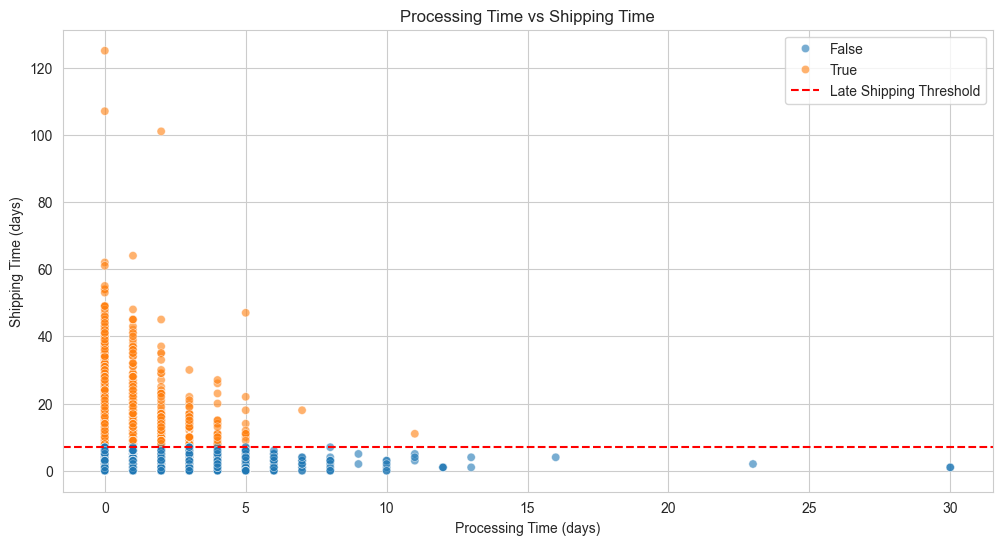

,processing_time,shipping_time
processing_time,1.000000,-0.009568
shipping_time,-0.009568,1.000000


In [10]:
# Scatter plot: slow approvals vs shipping delays
sns.scatterplot(x='processing_time', y='shipping_time', hue='late_shipping_flag', data=orders, alpha=0.6)
plt.axhline(7, color='red', linestyle='--', label='Late Shipping Threshold')
plt.title('Processing Time vs Shipping Time')
plt.xlabel('Processing Time (days)')
plt.ylabel('Shipping Time (days)')
plt.legend()
plt.show()

# Correlation
orders[['processing_time','shipping_time']].corr()


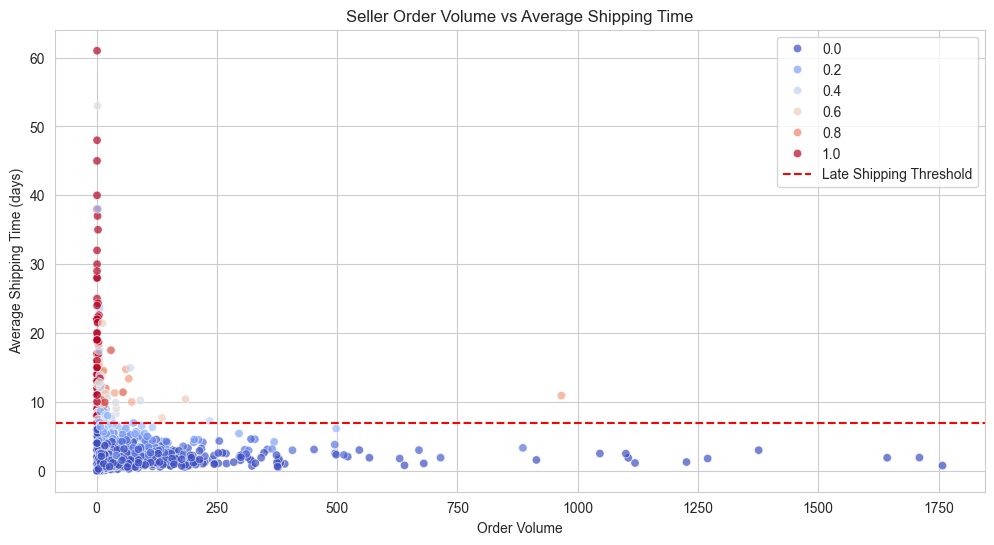

In [11]:
# Aggregate average shipping time by seller
seller_shipping = orders.groupby('seller_id').agg(
    avg_shipping_time=('shipping_time','mean'),
    order_volume=('order_id','count'),
    late_shipping_rate=('late_shipping_flag','mean')
).reset_index()

# Scatter plot: Order volume vs avg shipping time
sns.scatterplot(x='order_volume', y='avg_shipping_time', hue='late_shipping_rate', data=seller_shipping, palette='coolwarm', alpha=0.7)
plt.axhline(7, color='red', linestyle='--', label='Late Shipping Threshold')
plt.title('Seller Order Volume vs Average Shipping Time')
plt.xlabel('Order Volume')
plt.ylabel('Average Shipping Time (days)')
plt.legend()
plt.show()


In [12]:
sellers.columns

Index(['seller_id', 'order_volume', 'avg_processing_time', 'avg_shipping_time',
       'slow_processing_rate', 'late_shipping_rate'],
      dtype='object')

In [13]:
seller_shipping[seller_shipping['avg_shipping_time'] > 7]['order_volume'].mean()

np.float64(15.898477157360405)

In [14]:
sellers

,seller_id,order_volume,avg_processing_time,avg_shipping_time,slow_processing_rate,late_shipping_rate
0,0015a82c2db000af6aaaf3ae2ecb0532,3,0.333333,2.333333,0.000000,0.000000
1,001cca7ae9ae17fb1caed9dfb1094831,194,0.252577,1.695876,0.000000,0.010309
2,002100f778ceb8431b7a1020ff7ab48f,49,0.755102,2.979592,0.020408,0.020408
3,003554e2dce176b5555353e4f3555ac8,1,0.000000,0.000000,0.000000,0.000000
4,004c9cd9d87a3c30c522c48c4fc07416,154,0.227273,0.889610,0.000000,0.000000
...,...,...,...,...,...,...
2946,ffc470761de7d0232558ba5e786e57b7,27,0.370370,0.592593,0.000000,0.000000
2947,ffdd9f82b9a447f6f8d4b91554cc7dd3,17,0.058824,3.647059,0.000000,0.000000
2948,ffeee66ac5d5a62fe688b9d26f83f534,14,0.500000,5.642857,0.000000,0.214286
2949,fffd5413c0700ac820c7069d66d98c89,53,0.169811,1.528302,0.000000,0.037736


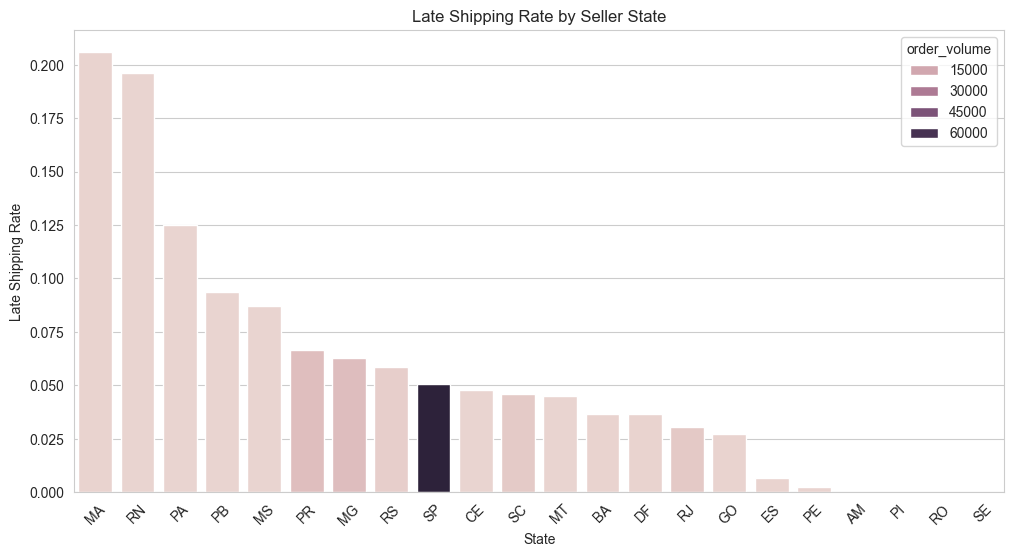

In [15]:
# Avg shipping time by state
state_shipping = orders.groupby('seller_state').agg(
    avg_shipping_time=('shipping_time','mean'),
    late_shipping_rate=('late_shipping_flag','mean'),
    order_volume = ("order_id",'count')
).reset_index().sort_values('late_shipping_rate', ascending=False)

sns.barplot(x='seller_state', y='late_shipping_rate', data=state_shipping, hue='order_volume')
plt.title('Late Shipping Rate by Seller State')
plt.ylabel('Late Shipping Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Example: Sellers with extreme shipping delays
extreme_sellers = seller_shipping[seller_shipping['avg_shipping_time']>7].sort_values('late_shipping_rate', ascending=False)
extreme_sellers.head(10)


,seller_id,avg_shipping_time,order_volume,late_shipping_rate
11,010da0602d7774602cd1b3f5fb7b709e,20.0,1,1.0
12,011b0eaba87386a2ae96a7d32bb531d1,14.0,1,1.0
47,04843805947f0fc584fc1969b6e50fe7,8.0,1,1.0
144,0bb27263628258b8111a0262769fa9db,40.0,1,1.0
122,0a198e95d32b1be2da9424c962a6ebfa,12.0,1,1.0
893,4dab98ca6cd6d3df586203cefd28a042,9.0,1,1.0
904,4e42581f08e8cfc7c090f930bac4552a,30.0,1,1.0
227,13e85aac53340018b40c2af68001b7e0,10.0,1,1.0
219,1352e06ae67b410cdae0b2a22361167b,17.0,2,1.0
284,19484c79cef6c062cb177aa4ef2fcc3c,19.0,1,1.0


In [17]:
sellers.describe()

,order_volume,avg_processing_time,avg_shipping_time,slow_processing_rate,late_shipping_rate
count,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000
mean,32.220264,0.228875,2.773285,0.000241,0.072325
std,103.172731,0.343263,3.977812,0.006560,0.199136
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000
50%,7.000000,0.153846,1.714286,0.000000,0.000000
75%,22.000000,0.307692,3.121324,0.000000,0.014816
max,1758.000000,5.000000,61.000000,0.333333,1.000000


In [18]:
(sellers[sellers['order_volume'] > 7]).describe()

,order_volume,avg_processing_time,avg_shipping_time,slow_processing_rate,late_shipping_rate
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,65.243341,0.230971,2.347803,0.000271,0.056868
std,143.379662,0.161815,2.202658,0.003385,0.129131
min,8.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.125000,1.020202,0.000000,0.000000
50%,24.000000,0.215909,1.666667,0.000000,0.000000
75%,60.000000,0.300000,2.855422,0.000000,0.054054
max,1758.000000,2.058824,21.416667,0.090909,0.941176


In [19]:
(sellers[sellers['order_volume'] <= 7]).describe()

,order_volume,avg_processing_time,avg_shipping_time,slow_processing_rate,late_shipping_rate
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,2.854673,0.227011,3.151643,0.000213,0.086069
std,1.922924,0.446527,5.028336,0.008434,0.244361
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.762500,0.000000,0.000000
50%,2.000000,0.000000,1.833333,0.000000,0.000000
75%,4.000000,0.333333,3.500000,0.000000,0.000000
max,7.000000,5.000000,61.000000,0.333333,1.000000


Low-volume sellers have worse average shipping performance and higher late rates.

Operational shipping delays arise from two distinct seller failure modes. A very small group of high-volume sellers drives a disproportionate share of total late shipments due to scale effects, while a broader population of low-volume sellers exhibits poorer per-order shipping reliability but limited aggregate impact. Effective intervention therefore requires differentiated strategies: targeted operational optimization for high-volume sellers and stricter governance or activation controls for low-volume sellers.

In [20]:
orders[orders['shipping_time'] > 7].describe()

,processing_time,shipping_time,delivery_time,delivery_delay
count,4937.000000,4937.000000,4937.000000,4937.000000
mean,0.262508,13.321855,9.410168,-6.423334
std,0.675124,6.973375,10.127194,14.523546
min,0.000000,8.000000,0.000000,-76.000000
25%,0.000000,9.000000,4.000000,-14.000000
50%,0.000000,11.000000,7.000000,-7.000000
75%,0.000000,15.000000,12.000000,0.000000
max,11.000000,125.000000,195.000000,181.000000


In [21]:
orders.describe()

,processing_time,shipping_time,delivery_time,delivery_delay
count,95082.000000,95082.000000,95082.000000,95082.000000
mean,0.241139,2.351581,8.910320,-11.824236
std,0.666343,3.490630,8.755815,10.198932
min,0.000000,0.000000,0.000000,-147.000000
25%,0.000000,0.000000,4.000000,-17.000000
50%,0.000000,1.000000,7.000000,-12.000000
75%,0.000000,3.000000,12.000000,-7.000000
max,30.000000,125.000000,205.000000,188.000000


In [23]:
sellers.describe()

,order_volume,avg_processing_time,avg_shipping_time,slow_processing_rate,late_shipping_rate
count,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000
mean,32.220264,0.228875,2.773285,0.000241,0.072325
std,103.172731,0.343263,3.977812,0.006560,0.199136
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000
50%,7.000000,0.153846,1.714286,0.000000,0.000000
75%,22.000000,0.307692,3.121324,0.000000,0.014816
max,1758.000000,5.000000,61.000000,0.333333,1.000000


In [28]:
sellers[sellers['late_shipping_rate']>0.20]['order_volume'].sum()

np.int64(6162)

In [29]:
total_orders = len(orders)
total_late_shipments = orders['late_shipping_flag'].sum()

total_orders, total_late_shipments


(95082, np.int64(4937))

In [30]:
seller_kpis = (
    orders
    .groupby('seller_id')
    .agg(
        order_volume=('order_id', 'count'),
        late_shipments=('late_shipping_flag', 'sum')
    )
    .reset_index()
)

seller_kpis['late_shipping_rate'] = (
    seller_kpis['late_shipments'] / seller_kpis['order_volume']
)

seller_kpis['impact_score'] = (
    seller_kpis['late_shipments']   # actual late count, not implied
)


In [31]:
seller_kpis_sorted = seller_kpis.sort_values(
    'late_shipments', ascending=False
)

seller_kpis_sorted['cum_late_shipments'] = (
    seller_kpis_sorted['late_shipments'].cumsum()
)

seller_kpis_sorted['cum_pct_late'] = (
    seller_kpis_sorted['cum_late_shipments'] / total_late_shipments
)


In [32]:
top5 = seller_kpis_sorted.head(5)

top5_orders = top5['order_volume'].sum()
top5_late_shipments = top5['late_shipments'].sum()
top5_pct_of_late = top5_late_shipments / total_late_shipments

top5_orders, top5_late_shipments, top5_pct_of_late


(np.int64(2020), np.int64(1141), np.float64(0.2311120113429208))

In [33]:
market_late_rate = (
    seller_kpis['late_shipments'].sum() /
    seller_kpis['order_volume'].sum()
)

top5_late_rate = (
    top5_late_shipments / top5_orders
)

sla_gap = top5_late_rate - market_late_rate

market_late_rate, top5_late_rate, sla_gap


(np.float64(0.05192360278496456),
 np.float64(0.5648514851485148),
 np.float64(0.5129278823635502))

In [37]:
orders[orders['shipping_time'] > 7].describe()

,processing_time,shipping_time,delivery_time,delivery_delay
count,4937.000000,4937.000000,4937.000000,4937.000000
mean,0.262508,13.321855,9.410168,-6.423334
std,0.675124,6.973375,10.127194,14.523546
min,0.000000,8.000000,0.000000,-76.000000
25%,0.000000,9.000000,4.000000,-14.000000
50%,0.000000,11.000000,7.000000,-7.000000
75%,0.000000,15.000000,12.000000,0.000000
max,11.000000,125.000000,195.000000,181.000000


In [ ]:
orders['late_shipping_flag'].describe()